In [108]:
import tensorflow

In [109]:
from numpy.random import seed
seed(101)
import tensorflow
tensorflow.random.set_seed(101)

In [110]:
import numpy as np 
import pandas as pd 

In [111]:
df = pd.read_csv('cleaned_data/data_with_features.csv')
df = df.drop(df.columns[0], axis = 1)

In [112]:
steps = 20
batch_size = 256

In [113]:
user_length = df['EthicaID'].value_counts().reset_index().rename({'EthicaID':'count', 'index': 'EthicaID'}, axis = 1)
train_length = ((np.array(user_length['count'])//1.25) + (batch_size-(np.array(user_length['count'])//1.25)%batch_size)) + steps
rest = np.array(user_length['count']) - train_length
valid_length = (rest//2 - steps) + (batch_size-(((rest//2-steps)%batch_size))) + steps

rest_2 = np.array(user_length['count']) -  train_length - valid_length
test_length = (rest_2- steps - (rest_2 - steps)%batch_size) + steps

In [114]:
user_length

,EthicaID,count
0,User #15208,88895
1,User #23875,80499
2,User #25522,80026
3,User #15588,69309
4,User #24346,67255
...,...,...
181,User #15273,5678
182,User #25167,5532
183,User #25201,5268
184,User #23979,5110


In [100]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(11,7)})
sns.set_theme(style='white')

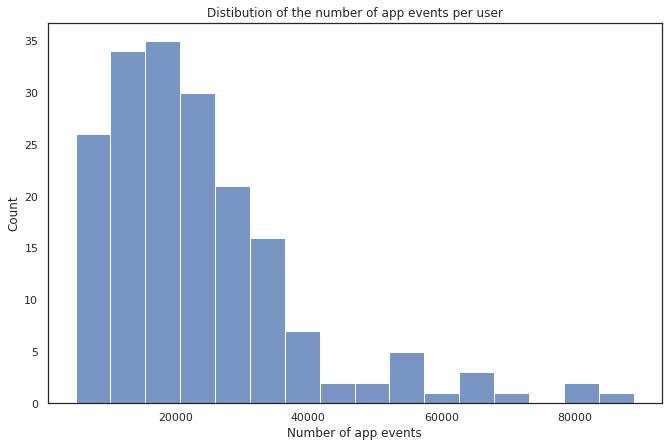

In [101]:
hist = sns.histplot(user_length['count'].rename({'count': 'number of app events'}, axis = 1))
hist.set(title='Distibution of the number of app events per user')
hist.set_xlabel('Number of app events')
hist.figure.savefig("Distibution of the number of app records per user.png")

In [64]:
((np.array(user_length['count'])) - (valid_length + test_length + train_length) >= 0).sum()

186

In [65]:
((np.array(user_length['count'])) - (valid_length + test_length + train_length)).sum()

22814.0

In [66]:
((np.array(user_length['count'])) - (valid_length + test_length + train_length)).sum() / np.array(user_length['count']).sum() 

0.005161634220363364

In [67]:
train_batches = []
train = df[0:0]

for user, length in zip(user_length['EthicaID'], train_length):
    length = int(length)
    df_single_user = df.loc[df['EthicaID'] == user]
    df_train = df_single_user[:length]
    train = pd.concat([train.reset_index(drop= True), df_train.reset_index(drop = True)])
    train_batches.append(len(df_train))  
    
valid_batches = []
lst_valid = []

for user, length_train, length_valid in zip(user_length['EthicaID'], train_length, valid_length):
    length_train = int(length_train)
    length_valid = int(length_valid)
    df_single_user = df.loc[df['EthicaID'] == user]
    df_valid = df_single_user[length_train: length_train+length_valid]
    lst_valid.append(df_valid)
    valid_batches.append(len(df_valid))
    
valid = pd.concat(lst_valid, axis = 0)
del lst_valid

test_batches = []
lst_test = []

for user, length_prev, length_test in zip(user_length['EthicaID'], train_length + valid_length, test_length):
    length_prev = int(length_prev)
    length_test = int(length_test)
    df_single_user = df.loc[df['EthicaID'] == user]
    df_test = df_single_user[length_prev: length_prev+length_test]
    lst_test.append(df_test)
    test_batches.append(len(df_test))

test = pd.concat(lst_test, axis = 0)
del lst_test

In [68]:
batches = pd.DataFrame({'train': train_batches, 'validation': valid_batches, 'testing': test_batches}) 

In [69]:
batches

,train,validation,testing
0,71208,9000,8488
1,64552,7976,7720
2,64296,7976,7720
3,55592,6952,6696
4,54056,6696,6440
...,...,...,...
181,4648,552,296
182,4648,552,296
183,4392,552,296
184,4136,552,296


In [70]:
(user_length['count'] - (np.array(test_batches) + np.array(train_batches) + np.array(valid_batches)) >= 0).sum()

186

In [71]:
train.to_csv('cleaned_data/model_training_MQ&RQ1/training_data_each_user_batch256_steps20.csv')
test.to_csv('cleaned_data/model_training_MQ&RQ1/testing_data_each_user_batch256_steps20.csv')
valid.to_csv('cleaned_data/model_training_MQ&RQ1/validation_data_each_user_batch256_steps20.csv')
batches.to_csv('cleaned_data/model_training_MQ&RQ1/batch_size_each_user_batch256_steps20.csv')